In [1]:
import os
import json
import astropy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import Distance
from astropy.cosmology import Planck15
# pd.set_option('display.max_rows', 500)

In [2]:
def absmag(m, z):
    '''
    Converts apparent magnitude to absolute magnitude.
    
    Args:
        m (float): apparent magnitude
        z (float): redshift
    '''
    z = float(z)
    if m is None or m is np.nan or z is None or z is np.nan:
        return np.nan
    else:
        if z==0:
            M = m
        elif z < 0:
            M = m
        else:
            d = Distance(unit=u.pc, z=float(z), allow_negative=True)
            M = m - 5 * np.log10(d/(10*u.pc)) + 5
        return M
absmag = np.vectorize(absmag)

In [3]:
df_ztfrest = pd.read_csv('ZTFReST.csv')
ztfredshifts = df_ztfrest.dropna(subset=["redshift"]).copy().reset_index(drop=True)

objIds = sorted(list(set(ztfredshifts["id"])))

In [4]:
data_folder = 'data/'
photometry_dict = {}


for root, dirs, files in sorted(os.walk(data_folder)):
    for file in files:
        if file == 'photometry.json':
            folder_name = os.path.basename(root)
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                photometry_dict[folder_name] = json.load(f)

In [5]:
lc_dict = {key: pd.DataFrame.from_dict(val) for key, val in photometry_dict.items()}

In [6]:
for key, value in lc_dict.items():
    if value.empty:
        continue
    display(key, value)
    break

'ZTF18aakuewf'

,obj_id,ra,dec,filter,mjd,snr,instrument_id,instrument_name,ra_unc,dec_unc,origin,id,altdata,created_at,groups,annotations,mag,magerr,magsys,limiting_mag
0,ZTF18aakuewf,NaN,NaN,ztfr,58197.500532,NaN,1,ZTF,None,None,None,201111494,None,2022-04-12T21:52:29.589147,"[{'id': 13, 'created_at': '2020-10-21T06:20:33...",[],NaN,NaN,ab,18.992901
1,ZTF18aakuewf,NaN,NaN,ztfr,58198.394132,NaN,1,ZTF,None,None,None,201112158,None,2022-04-12T21:52:32.025953,"[{'id': 13, 'created_at': '2020-10-21T06:20:33...",[],NaN,NaN,ab,20.430599
2,ZTF18aakuewf,NaN,NaN,ztfr,58198.398623,NaN,1,ZTF,None,None,None,201112159,None,2022-04-12T21:52:32.026048,"[{'id': 13, 'created_at': '2020-10-21T06:20:33...",[],NaN,NaN,ab,20.457500
3,ZTF18aakuewf,NaN,NaN,ztfr,58198.435081,NaN,1,ZTF,None,None,None,201112160,None,2022-04-12T21:52:32.026070,"[{'id': 13, 'created_at': '2020-10-21T06:20:33...",[],NaN,NaN,ab,20.568701
4,ZTF18aakuewf,NaN,NaN,ztfr,58198.455567,NaN,1,ZTF,None,None,None,201112161,None,2022-04-12T21:52:32.026087,"[{'id': 13, 'created_at': '2020-10-21T06:20:33...",[],NaN,NaN,ab,20.582800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,ZTF18aakuewf,243.594364,35.917906,ztfg,60404.383160,-7.096196,1,ZTF,None,None,None,549517352,None,2024-04-04T09:24:47.661084,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.114743
4011,ZTF18aakuewf,243.594364,35.917906,ztfg,60404.383160,-7.096176,1,ZTF,None,None,None,550526140,None,2024-04-08T12:15:22.204927,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.114736
4012,ZTF18aakuewf,NaN,NaN,ztfr,60404.468993,NaN,1,ZTF,None,None,None,550526141,None,2024-04-08T12:15:22.204996,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.610300
4013,ZTF18aakuewf,NaN,NaN,ztfr,60408.427940,NaN,1,ZTF,None,None,None,550526142,None,2024-04-08T12:15:22.205046,"[{'id': 3, 'created_at': '2020-10-21T06:20:33....",[],NaN,NaN,ab,20.571699


In [7]:
# Initialize an empty dictionary to store non-empty items
flc_dict = {}
elc_dict = {}

# Iterate over the items in lc_dict
for key, value in lc_dict.items():
    # Check if the value is not empty
    if not value.empty:
        # If the value is not empty, add it to the new dictionary
        flc_dict[key] = value
    else:
        # If the value is empty, print the key
        print(f"{key}")
        elc_dict[key] = value

# Now non_empty_lc_dict contains only the items from lc_dict that are not empty

print('number of non-empty lightcurves:', len(flc_dict))
print('number of empty lightcurves:', len(elc_dict))
flc_dict = {key: val[val['mag'].notna()] for key, val in flc_dict.items()}

194.94985-47.75
Swift-J002325.5-141701
Swift-J181727.0-192921
ZTF18abfcmjwm
ZTF18abianhw
ZTF18abukavnm
ZTF18abvkwlam
ZTF19aankdan
ZTF19aapuudk
ZTF19aasexmy
ZTF19abeyvoi
ZTF19abobxik
ZTF19abrpfps
ZTF19abuvqgw
ZTF19acaxbjt
ZTF19acayojs
ZTF19accxzsc
ZTF20aaelulum
ZTF20aazrcbp
ZTF20ababxjv
ZTF20abmocba
ZTF20acigmelm
ZTF22abvvmti
number of non-empty lightcurves: 191
number of empty lightcurves: 23


In [8]:
df_eval = pd.read_csv('candidateEval07-18.csv')
display(df_eval.head())

## print all objects that have an uncertainty in the redshift, then strip the uncertainty from the redshift column
print('objects with uncertainties in redshift:')
for index, row in df_eval.iterrows():
    if '±' in str(row['redshift']):
        print(row['object'])
        df_eval.loc[index, 'redshift'] = float(row['redshift'].split('±')[0])
        
## print number of objects with redshifts
print('number of objects with redshifts:', len(df_eval[df_eval['redshift'].notnull()]))
print('number of objects without redshifts:', len(df_eval[df_eval['redshift'].isnull()]))
print('number of objects with redshifts and classifications:', len(df_eval[df_eval['redshift'].notnull() & df_eval['class'].notnull()]))
print('unique classifications:')
[print(i) for i in df_eval['class'].unique() if pd.notnull(i)];

,object,redshift,class,captures_ztfg_rise,captures_ztfg_fade,captures_ztfr_rise,captures_ztfr_fade,has_ztfi,ztfg_rise,ztfg_fade,ztfr_rise,ztfr_fade,ztfi_rise,ztfi_fade,usability,notes,citation
0,ZTF18aakuewf,0.0636,Ibn,n,y,y,y,n,NaN,58225-58240,58225-58230,58230-58250,NaN,NaN,4,NaN,https://www.aanda.org/articles/aa/abs/2021/05/...
1,ZTF18aalrxas,0.0582 ± 0.0003,IIb,y,y,n,y,n,58227-58230,58229-58235,NaN,58229-58232,NaN,NaN,3,lowish quality ztfr,https://arxiv.org/abs/1903.09262
2,ZTF18abantmh,NaN,NaN,n,n,n,n,n,NaN,NaN,NaN,NaN,NaN,NaN,0,low quality,NaN
3,ZTF18abffyqp,0.031,II,m,m,m,m,n,58307-58309,58308-58315,58307-58309,58308-58315,NaN,NaN,3,data gap at peak; odd second peak,https://arxiv.org/abs/2008.09986
4,ZTF18abvkmgw,0.03847,Ib,y,y,y,y,n,58373-58378,58377-58383,58375-58378,58377-58386,NaN,NaN,3,decent g,https://www.wis-tns.org/object/2018ghd


objects with uncertainties in redshift:
ZTF18aalrxas
ZTF20abummyz
ZTF22acaruqr
number of objects with redshifts: 80
number of objects without redshifts: 111
number of objects with redshifts and classifications: 73
unique classifications:
Ibn
IIb
II
Ib
Ic-BL
long GRB
Ia
GRB
Novae
orphan
unclear
afterglow
FOT
FOT;orphan
U Gem
Cataclysmic
Ib/c;Ib-pec
Tidal Disruption Event
Novae;Classical Nova
FBOT
FBOT; Cataclysmic
afterglow; Ic-BL
IIP


In [9]:
df_eval[df_eval['object'] == 'ZTF18abffyqp']

,object,redshift,class,captures_ztfg_rise,captures_ztfg_fade,captures_ztfr_rise,captures_ztfr_fade,has_ztfi,ztfg_rise,ztfg_fade,ztfr_rise,ztfr_fade,ztfi_rise,ztfi_fade,usability,notes,citation
3,ZTF18abffyqp,0.031,II,m,m,m,m,n,58307-58309,58308-58315,58307-58309,58308-58315,NaN,NaN,3,data gap at peak; odd second peak,https://arxiv.org/abs/2008.09986


In [10]:
hq_cands = df_eval[df_eval['usability'] >= 4]
mq_cands = df_eval[(df_eval['usability'] < 4) & (df_eval['usability'] > 2)]
lq_cands = df_eval[(df_eval['usability'] < 3) & (df_eval['usability'] >= 1)]
z_cands = df_eval.dropna(subset=['redshift'])
hflc_dict = {key: value for key, value in flc_dict.items() if key in hq_cands['object'].values} ## high quality
mflc_dict = {key: value for key, value in flc_dict.items() if key in mq_cands['object'].values} ## medium quality
lflc_dict = {key: value for key, value in flc_dict.items() if key in lq_cands['object'].values} ## low quality
zlc_dict =  {key: value for key, value in flc_dict.items() if key in z_cands['object'].values} ## redshift 

In [11]:
#display(zlc_dict['ZTF18aakuewf'].head())
for item in zlc_dict:
    if df_eval[df_eval['object'] == item]['usability'].values[0] == 0:
        continue
    #print(item)
    #zlc_dict[item]['absmag'] = absmag(zlc_dict[item]['mag'], z_cands[z_cands['object'] == item]['redshift'].values[0])
    try:
        zlc_dict[item]['absmag'] = absmag(zlc_dict[item]['mag'], z_cands[z_cands['object'] == item]['redshift'].values[0])
    except:
        print(item)
        print('error: ', z_cands[z_cands['object'] == item]['redshift'].values[0])
        print(zlc_dict[item]['mag'])

/var/folders/8_/ky643qs168ngjmhrpwcq1fdm0000gn/T/ipykernel_71966/537899906.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zlc_dict[item]['absmag'] = absmag(zlc_dict[item]['mag'], z_cands[z_cands['object'] == item]['redshift'].values[0])
/var/folders/8_/ky643qs168ngjmhrpwcq1fdm0000gn/T/ipykernel_71966/537899906.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zlc_dict[item]['absmag'] = absmag(zlc_dict[item]['mag'], z_cands[z_cands['object'] == item]['redshift'].values[0])
/var/folders/8_/ky643qs168ng

In [12]:
IIbs = df_eval[(df_eval['class'] == 'IIb') ]
# display(IIbs)
IIbs = IIbs['object'].values

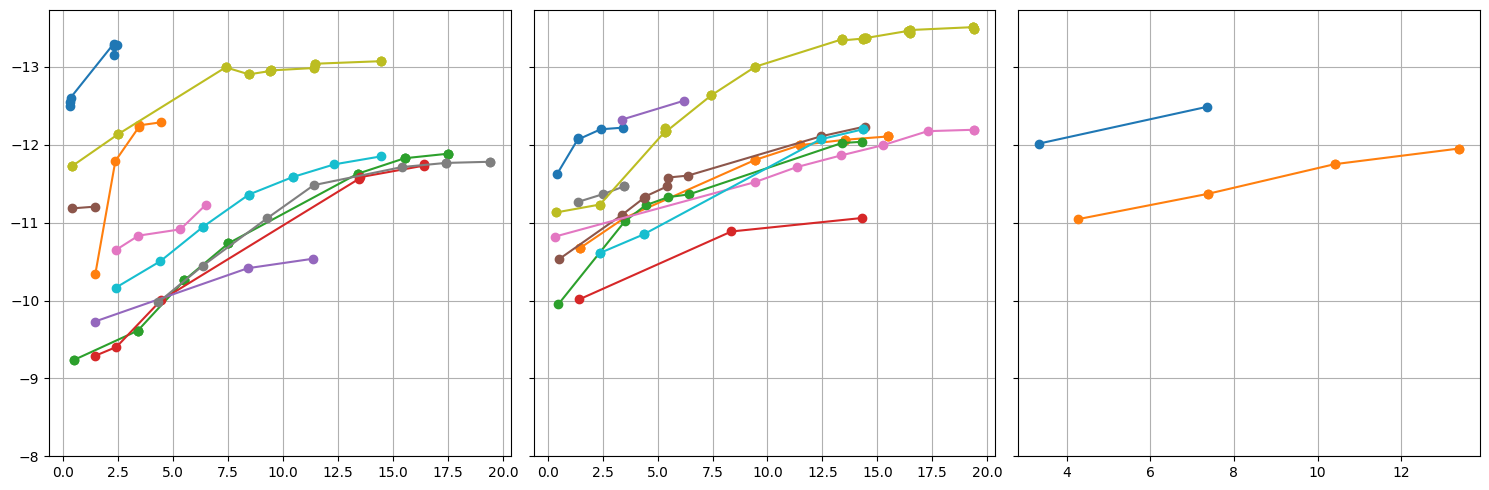

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

for key, value in zlc_dict.items():
    if key not in IIbs:
        continue

    # print(key)
    for i, filt in enumerate(['ztfg', 'ztfr', 'ztfi']):
        filt_val = value[value['filter'] == filt]
        # print(df_eval[df_eval['object'] == key][f'{filter}_rise'])
        # print(df_eval.columns)
        # print(f'{filt}_rise')
        rise_times = df_eval[df_eval['object'] == key][f'{filt}_rise'].values[0]
        #print(rise_times)
        if type(rise_times) != str:
            continue
        rise_start, rise_end = rise_times.split('-')
        rise_start, rise_end = float(rise_start), float(rise_end)
        filt_val = filt_val[(filt_val['mjd'] > float(rise_start)) & (filt_val['mjd'] < float(rise_end))]
        times = filt_val['mjd'] - float(rise_start)
        values = filt_val['absmag']
        # print(times)
        ax[i].plot(times, values, '-o')
[ax[i].invert_yaxis() for i in range(3)]
[ax[i].set_ylim(-8,) for i in range(3)]


[ax[i].grid() for i in range(3)]
fig.tight_layout();
plt.show();

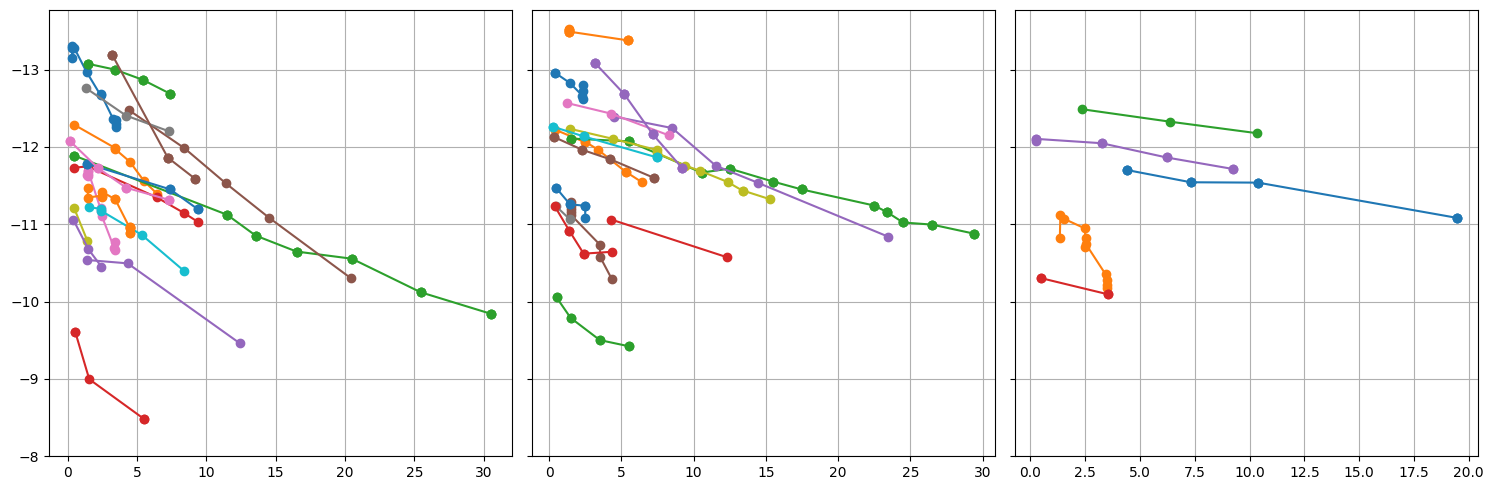

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

for key, value in zlc_dict.items():
    if key not in IIbs:
        continue
    for i, filt in enumerate(['ztfg', 'ztfr', 'ztfi']):
        filt_val = value[value['filter'] == filt]
        # print(df_eval[df_eval['object'] == key][f'{filter}_fade'])
        fade_times = df_eval[df_eval['object'] == key][f'{filt}_fade'].values[0]
        #print(fade_times)
        if type(fade_times) != str:
            continue
        fade_start, fade_end = fade_times.split('-')
        fade_start, fade_end = float(fade_start), float(fade_end)
        filt_val = filt_val[(filt_val['mjd'] > float(fade_start)) & (filt_val['mjd'] < float(fade_end))]
        times = filt_val['mjd'] - float(fade_start)
        values = filt_val['absmag']
        # print(times)
        ax[i].plot(times, values, '-o')
[ax[i].invert_yaxis() for i in range(3)]
[ax[i].set_ylim(-8,) for i in range(3)]
[ax[i].grid() for i in range(3)]
fig.tight_layout();

# Lightcurve Interpolation

In [15]:
from scipy.interpolate import interp1d
from scipy.interpolate import krogh_interpolate as krogh
from scipy.interpolate import barycentric_interpolate as baryc
from scipy.interpolate import pchip_interpolate as pchip
def interpolate_lightcurve(data,start,stop,step):
    """
    Interpolate lightcurve data to a given reinterpolated_time interval
    """
    reinterpolated_time = np.arange(start,stop,step)
    #print(reinterpolated_time)
    data.drop_duplicates(subset='mjd', keep='first', inplace=True)
    ## do cubic if more than 4 points, quadratic if 3 points, linear if 2 points
    if len(data) <= 2:
        interp_1d_function = interp1d(data['mjd'],data['absmag'], kind='linear')
    else:
        interp_1d_function = interp1d(data['mjd'],data['absmag'], kind='quadratic')
    # else:
    #     interp_1d_function = interp1d(data['mjd'],data['absmag'], kind='cubic')
    interpolated_data = interp_1d_function(reinterpolated_time)
    # interpolated_data = krogh(data['mjd'],data['absmag'], reinterpolated_time)
    # interpolated_data = interpolated_data_function(reinterpolated_time)
    #print(interpolated_data)
    return reinterpolated_time, interpolated_data

In [16]:
# starting_reinterpolated_data = {}
# for key, value in zlc_dict.items():
#     starting_reinterpolated_data[key] = {}
#     for filt in ['ztfg', 'ztfr', 'ztfi']:
#         filt_val = value[value['filter'] == filt]
#         filt_val = filt_val[filt_val['absmag'].notnull()]
        
        
#         rise_times = df_eval[df_eval['object'] == key][f'{filt}_rise'].values[0]
#         #print(rise_times)
#         if type(rise_times) != str:
#             continue
#         start, stop = float(rise_times.split('-')[0]), float(rise_times.split('-')[1])

        
#         # start = filt_val['mjd'].min()
#         # stop = filt_val['mjd'].max()
#         step = 0.017
        
#         ## if filter is empty, skip
#         if filt_val.empty:
#             continue
#         filt_val = filt_val[(filt_val['mjd'] > start) & (filt_val['mjd'] < stop)]
#         start, stop = filt_val['mjd'].min(), filt_val['mjd'].max()
#         time, interpolated_data = interpolate_lightcurve(filt_val,start,stop,step)
#         starting_reinterpolated_data[key][filt] = pd.DataFrame({'mjd': time, filt: interpolated_data})

In [17]:
## plot the interpolated lightcurves
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
# for key, value in starting_reinterpolated_data.items():
#     for i, filt in enumerate(['ztfg', 'ztfr', 'ztfi']):
#         filt_val = value[filt] if filt in value.keys() else None
#         if filt_val is None:
#             continue
#         # print(df_eval[df_eval['object'] == key][f'{filter}_fade'])
#         fade_times = df_eval[df_eval['object'] == key][f'{filt}_fade'].values[0]
#         #print(fade_times)
#         if type(fade_times) != str:
#             continue
#         fade_start, fade_end = fade_times.split('-')
#         fade_start, fade_end = float(fade_start), float(fade_end)
#         filt_val = filt_val[(filt_val['mjd'] > float(fade_start)) & (filt_val['mjd'] < float(fade_end))]
#         times = filt_val['mjd'] - float(fade_start)
#         values = filt_val[filt]
#         # print(times)
#         ax[i].plot(times, values, '-')
# [ax[i].invert_yaxis() for i in range(3)]
# [ax[i].set_ylim(-8,-24) for i in range(3)]
# [ax[i].grid() for i in range(3)]
# fig.tight_layout();

In [18]:
# ## plot histogram of all peak absolute magnitudes in each band
# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# peak_mags = {}
# for item in zlc_dict:
#     for band in zlc_dict[item]['filter'].unique():
#         if band in ['ztfg', 'ztfr', 'ztfi']:
#             if band not in peak_mags:
#                 peak_mags[band] = []
#             peak_mags[band].append(zlc_dict[item][zlc_dict[item]['filter'] == band]['absmag'].min())

# ## drop any inf values
# for band in peak_mags:
#     peak_mags[band] = [i for i in peak_mags[band] if i != np.inf]

# for band in peak_mags:
#     ax.hist(peak_mags[band], bins=20,  label=band)

In [19]:
## function to calculate rate of change of magnitude for data points that fall within a certain time window, defined by a min and max time value in the data
def calc_rate(data, min_time, max_time):
    data = data[(data['mjd'] >= min_time) & (data['mjd'] <= max_time)]

    if len(data) > 1:
        rate = (data['mag'].iloc[-1] - data['mag'].iloc[0]) / (data['mjd'].iloc[-1] - data['mjd'].iloc[0])
    else:
        rate = np.nan
    return rate
    

In [20]:
fade_rates = {}
rise_rates = {}
for key, value in zlc_dict.items():
    # print(key)
    #print(value)
    item_fade_rates = {}
    item_rise_rates = {}
    for filt in ['ztfg','ztfr','ztfi']:

        filter_rise_times = df_eval[df_eval['object'] == key][f'{filt}_rise'].values[0]
        #print('hardcode test',df_eval[df_eval['object'] == 'ZTF18aalrxas'][f'ztfg_rise'].values[0]) if key == 'ZTF18aalrxas' else None
        filter_fade_times = df_eval[df_eval['object'] == key][f'{filt}_fade'].values[0]

        # print(type(filter_rise_times), type(filter_fade_times))
        if type(filter_rise_times) ==str:
            rise_start, rise_stop = filter_rise_times.split('-')
            item_rise_rates[filt] = calc_rate(value, float(rise_start), float(rise_stop))
        else:
            # print(f'\n{key} missing rise time for {filt}')
            # print(filter_rise_times)
            item_rise_rates[filt] = np.nan
        if type(filter_fade_times) == str:
            fade_start, fade_stop = filter_fade_times.split('-')
            item_fade_rates[filt] = calc_rate(value, float(fade_start), float(fade_stop))
        else:
            item_fade_rates[filt] = np.nan
            
    fade_rates[key] = item_fade_rates
    rise_rates[key] = item_rise_rates


In [21]:
df_rates = pd.DataFrame(columns=['object', 'filter', 'fade_rate', 'rise_rate'])
for item, value in zlc_dict.items():
    for filt in ['ztfg', 'ztfr', 'ztfi']:
        df_rates = pd.concat([df_rates, pd.DataFrame({'object': item, 'filter':filt}, index=[0])], ignore_index=True)
        df_rates.loc[df_rates.index[-1], 'fade_rate'] = fade_rates[item][filt] if item in fade_rates else np.nan
        df_rates.loc[df_rates.index[-1], 'rise_rate'] = rise_rates[item][filt] if item in rise_rates else np.nan

In [22]:
for item in df_rates.iterrows():
    item = item[1]
    item_df = zlc_dict[item['object']]
    item_df = item_df[item_df['filter'] == item['filter']]
    df_rates.loc[(df_rates['object'] == item['object'] ), 'redshift'] = df_eval[df_eval['object'] == item['object']]['redshift'].values[0]
    df_rates.loc[(df_rates['object'] == item['object'] ), 'class'] = df_eval[df_eval['object'] == item['object']]['class'].values[0]
    if item_df.empty:
        # print('empty dataframe')
        # print(item['object'], item['filter'])
        peak_mag = np.nan
    elif 'absmag' not in item_df.columns:
        print('\nabs mag not in columns')
        print(item['object'], item['filter'])
        peak_mag = np.nan
    elif item_df['absmag'].isnull().all():
        print('\nabs mag is null')
        print(item['object'], item['filter'])
        peak_mag = np.nan
    else:
        peak_mag = item_df['absmag'].min()
    if peak_mag == np.inf:
        peak_mag = np.nan
        
    df_rates.loc[(df_rates['object'] == item['object'] ) & (df_rates['filter'] == item['filter']), 'peak_absmag'] = peak_mag
        
    ## also append the redshift to the dataframe
    # df_rates.loc[(df_rates['object'] == item['object'] ), 'redshift'] = df_eval[df_eval['object'] == item['object']]['redshift'].values[0]

df_rates.dropna(subset=['peak_absmag'], inplace=True)
# display(df_rates)



abs mag not in columns
ZTF20acqntkr ztfg

abs mag not in columns
ZTF20acqntkr ztfr

abs mag not in columns
ZTF21abbvvmf ztfg

abs mag not in columns
ZTF21abbvvmf ztfr

abs mag not in columns
ZTF21abbvvmf ztfi

abs mag not in columns
ZTF23absafzo ztfr

abs mag not in columns
ZTF23absafzo ztfi


In [23]:
# import seaborn as sns

# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# df_riseplot = df_rates.dropna(subset=['rise_rate'])
# sns.scatterplot(data=df_riseplot, x='rise_rate', y='peak_absmag', hue='filter', style='class', ax=ax, s=100)
# ax.set_ylabel('Peak Absolute Magnitude')
# ax.set_xlabel('Rise Rate')
# ax.invert_yaxis()
# ax.legend()

# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# df_fadeplot = df_rates.dropna(subset=['fade_rate'])
# sns.scatterplot(data=df_riseplot, x='fade_rate', y='peak_absmag', hue='filter', style='class', ax=ax, s=100)
# ax.set_ylabel('Peak Absolute Magnitude')
# ax.set_xlabel('Fade Rate')
# ax.legend()
# ax.invert_yaxis()
# plt.show()


In [24]:
model='2022'

In [25]:
import json
import numpy as np
import pandas as pd

from sncosmo.bandpasses import _BANDPASSES
from astropy.time import Time
import glob

import matplotlib.pyplot as plt
import seaborn as sns
import time

import builtins

time_start = time.time()

def loadEvent(filename):
    """
    Reads in lightcurve data from a file and returns data in a dictionary format.
    
    Args:
    - filename (str): Path to lightcurve file
    
    Returns:
    - data (dict): Dictionary containing the lightcurve data from the file. The keys are generally 't' and each of the filters in the file as well as their accompanying error values.
    """
    if filename.endswith(".json"):
        with open(filename) as f:
            data = json.load(f)
            for key in data.keys():
                data[key] = np.array(data[key])
    else:
        lines = [line.rstrip("\n") for line in open(filename)]
        lines = builtins.filter(None, lines)

        sncosmo_filts = [val["name"] for val in _BANDPASSES.get_loaders_metadata()]
        sncosmo_maps = {name: name.replace(":", "_") for name in sncosmo_filts}

        data = {}
        for line in lines:
            lineSplit = line.split(" ")
            lineSplit = list(builtins.filter(None, lineSplit))
            mjd = Time(lineSplit[0], format="isot").mjd
            filt = lineSplit[1]

            if filt in sncosmo_maps:
                filt = sncosmo_maps[filt]

            mag = float(lineSplit[2])
            dmag = float(lineSplit[3])

            if filt not in data:
                data[filt] = np.empty((0, 3), float)
            data[filt] = np.append(data[filt], np.array([[mjd, mag, dmag]]), axis=0)

    return data

def read_lightcurve_file(filename: str):
    """
    Function to read in lightcurve file and create a dictionary containing the time (in days) at which the lightcurves 
    are evaluated and the corresponding values for different filters.
    """
    with open(filename, "r") as f:
        header = list(builtins.filter(None, f.readline().rstrip().strip("#").split(" ")))
    df = pd.read_csv(
        filename,
        delimiter=" ",
        comment="#",
        header=None,
        names=header,
        index_col=False,
    )
    df.rename(columns={"t[days]": "t"}, inplace=True)

    return df#.to_dict(orient="series")


if model == '2019':
    
    bulla_grid_files = sorted(glob.glob("lcs_bulla_2019/lcs/*.dat"))
elif model == '2022':
    bulla_grid_files = sorted(glob.glob("lcs_bulla_2022/*.dat"))

# print(bulla_grid_files[0])


# print(type(bulla_grid_files[0]))
# print(len(bulla_grid_files))
bulla_grid_lightcurves = {filename: read_lightcurve_file(filename) for filename in list(bulla_grid_files)}
time_end = time.time()
print(f"Time taken to load lightcurves: {time_end - time_start:.2f} seconds")

def get_peak(lightcurve, filter):
    '''
    Function to return the time of peak brightness and the peak brightness value for a given lightcurve and filter.
    
    Args:
    lightcurve (pd.DataFrame): Lightcurve data
    filter (str): Filter for which to find the peak brightness
    '''
    assert filter in lightcurve.columns, f"Filter {filter} not found in lightcurve data."
    
    max_luminosity_time = lightcurve[lightcurve[filter] == lightcurve[filter].min()]["t"].values[0]
    max_luminosity_value = lightcurve[filter].min()
    
    return max_luminosity_time, max_luminosity_value

def calc_rise(lightcurve, filter):
    '''
    Function to calculate the rise time for a given lightcurve and filter.
    
    Args:
    lightcurve (pd.DataFrame): Lightcurve data
    filter (str): Filter for which to calculate the rise time
    '''
    assert filter in lightcurve.columns, f"Filter {filter} not found in lightcurve data."
    
    max_luminosity_time, max_luminosity_value = get_peak(lightcurve, filter) ## this is inefficent for large datasets as it calculates the peak value three times when it only needs to do so once
    rise_values = lightcurve[lightcurve["t"] < max_luminosity_time][filter]
    rise = max_luminosity_value - rise_values.max() ## more robust method would be to do a linear fit to the rise values and calculate the slope
    ## calculate time between first data point and max luminosity time
    rise_time = max_luminosity_time - lightcurve["t"].min()
    rise_rate = rise / rise_time
    
    return rise_rate

def calc_fade(lightcurve, filter, cutoff=5):
    '''
    Function to calculate the fade rate for a given lightcurve and filter.
    
    Args:
    lightcurve (pd.DataFrame): Lightcurve data
    filter (str): Filter for which to calculate the fade rate
    cutoff (int): Number of days after the peak to consider when calculating the fade rate
    '''
    assert filter in lightcurve.columns, f"Filter {filter} not found in lightcurve data."
    
    max_luminosity_time, max_luminosity_value = get_peak(lightcurve, filter)
    fade_values = lightcurve[lightcurve["t"] > max_luminosity_time][filter] if cutoff is None else lightcurve[lightcurve["t"] > max_luminosity_time][lightcurve["t"] < max_luminosity_time + cutoff][filter]
    fade_values_times = lightcurve[lightcurve["t"] > max_luminosity_time]["t"] if cutoff is None else lightcurve[lightcurve["t"] > max_luminosity_time][lightcurve["t"] < max_luminosity_time + cutoff]["t"]
    fade = fade_values.min() - max_luminosity_value
    fade_time = fade_values_times.max() - max_luminosity_time
    fade_rate = fade / fade_time
    
    return fade_rate

fade_cutoff = 2
ztfg_max_luminosity_time, ztfg_max_luminosity_value = [], []
ztfr_max_luminosity_time, ztfr_max_luminosity_value = [], []
ztfi_max_luminosity_time, ztfi_max_luminosity_value = [], []

ztfg_rise_rate, ztfr_rise_rate, ztfi_rise_rate = [], [], []
ztfg_fade_rate, ztfr_fade_rate, ztfi_fade_rate = [], [], []

for key, value in bulla_grid_lightcurves.items():
    ztfg_max_luminosity_time.append(get_peak(value, "ztfg")[0])
    ztfg_max_luminosity_value.append(get_peak(value, "ztfg")[1])
    ztfr_max_luminosity_time.append(get_peak(value, "ztfr")[0])
    ztfr_max_luminosity_value.append(get_peak(value, "ztfr")[1])
    ztfi_max_luminosity_time.append(get_peak(value, "ztfi")[0])
    ztfi_max_luminosity_value.append(get_peak(value, "ztfi")[1])
    
    ztfg_rise_rate.append(calc_rise(value, "ztfg"))
    ztfr_rise_rate.append(calc_rise(value, "ztfr"))
    ztfi_rise_rate.append(calc_rise(value, "ztfi"))
    
    ztfg_fade_rate.append(calc_fade(value, "ztfg", fade_cutoff))
    ztfr_fade_rate.append(calc_fade(value, "ztfr", fade_cutoff))
    ztfi_fade_rate.append(calc_fade(value, "ztfi", fade_cutoff))
print(f'time required to calculate rates: {time.time() - time_end:.2f} seconds')
    
# fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
# ax[0].grid(), ax[1].grid(), ax[2].grid()
# ax[0].scatter(ztfg_rise_rate, ztfg_max_luminosity_value, color='g')
# ax[1].scatter(ztfr_rise_rate, ztfr_max_luminosity_value, color='r')
# ax[2].scatter(ztfi_rise_rate, ztfi_max_luminosity_value, color='b')


# ax[0].invert_yaxis(), ax[1].invert_yaxis(), ax[2].invert_yaxis()
# ax[0].set_ylabel("Peak Luminosity"), ax[1].set_ylabel("Peak Luminosity"), ax[2].set_ylabel("Peak Luminosity")
# ax[2].set_xlabel("Rise Rate (mag/day)");

Time taken to load lightcurves: 14.57 seconds


/var/folders/8_/ky643qs168ngjmhrpwcq1fdm0000gn/T/ipykernel_71966/1725411694.py:139: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fade_values = lightcurve[lightcurve["t"] > max_luminosity_time][filter] if cutoff is None else lightcurve[lightcurve["t"] > max_luminosity_time][lightcurve["t"] < max_luminosity_time + cutoff][filter]
/var/folders/8_/ky643qs168ngjmhrpwcq1fdm0000gn/T/ipykernel_71966/1725411694.py:140: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fade_values_times = lightcurve[lightcurve["t"] > max_luminosity_time]["t"] if cutoff is None else lightcurve[lightcurve["t"] > max_luminosity_time][lightcurve["t"] < max_luminosity_time + cutoff]["t"]


time required to calculate rates: 38.65 seconds


In [26]:
## grab all variants of the lightcurve classes and define a dictionary for their colors and markers
classes = df_rates['class'].unique()
print('number of classes:', len(classes))
colors = sns.color_palette("husl", len(classes))
## 19 unique classes
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'P', '*', 'X', 'd', 'H', 'h', '+', 'x', '|', '_', '.']
class_dict = {classes[i]: {'color': colors[i], 'marker': markers[i]} for i in range(len(classes))}

number of classes: 19


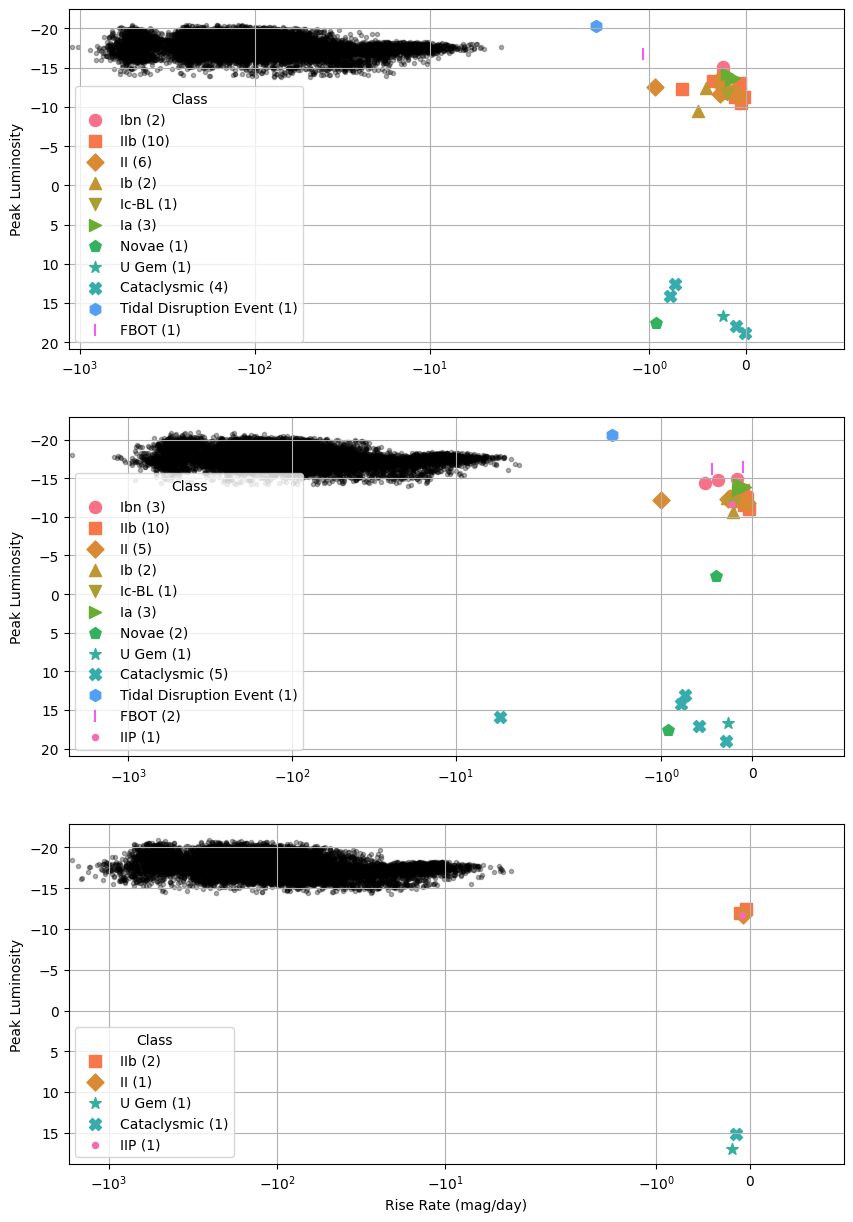

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=False)
ax[0].grid(), ax[1].grid(), ax[2].grid()
ax[0].scatter(ztfg_rise_rate, ztfg_max_luminosity_value, color='k', marker='.', alpha=0.3)
ax[1].scatter(ztfr_rise_rate, ztfr_max_luminosity_value, color='k', marker='.', alpha=0.3)
ax[2].scatter(ztfi_rise_rate, ztfi_max_luminosity_value, color='k', marker='.', alpha=0.3)
identified_objects = {'ztfg': [], 'ztfr': [], 'ztfi': []}
plotted_objects = {'ztfg': [], 'ztfr': [], 'ztfi': []}
df_riseplot = df_rates.dropna(subset=['rise_rate'])
for class_i in class_dict:
    #print('\nclass', class_i)
    for i, axi in enumerate(ax):
        filt = ['ztfg', 'ztfr', 'ztfi'][i]
        #print('filter:', ['ztfg', 'ztfr', 'ztfi'][i])   
        class_data = df_riseplot[df_riseplot['class'] == class_i]
        # identified_objects[filt] = class_data[class_data['filter'] == ['ztfg', 'ztfr', 'ztfi'][i]]['object'].values
        if len(class_data[class_data['filter'] == filt]) > 0:
            # plotted_objects[filt] = np.concatenate(plotted_objects[filt], class_data[class_data['filter'] == filt]['object'].values)
            #print('number of objects:', len(class_data[class_data['filter'] == filt]))
            axi.scatter(class_data[class_data['filter'] == filt]['rise_rate'], class_data[class_data['filter'] == filt]['peak_absmag'], color=class_dict[class_i]['color'], marker=class_dict[class_i]['marker'], label=class_i, s=75)
# sns.scatterplot(data=df_riseplot[df_riseplot['filter'] == 'ztfg'], x='rise_rate', y='peak_absmag', hue='class', style='class', ax=ax[0], s=100, color='k')
# sns.scatterplot(data=df_riseplot[df_riseplot['filter'] == 'ztfr'], x='rise_rate', y='peak_absmag',  hue='class', style='class', ax=ax[1], s=100, color='k')
# sns.scatterplot(data=df_riseplot[df_riseplot['filter'] == 'ztfi'], x='rise_rate', y='peak_absmag',  hue='class', style='class', ax=ax[2], s=100, color='k')


class_counts_ztfg = df_riseplot[df_riseplot['filter'] == 'ztfg']['class'].value_counts().to_dict()
class_counts_ztfr = df_riseplot[df_riseplot['filter'] == 'ztfr']['class'].value_counts().to_dict()
class_counts_ztfi = df_riseplot[df_riseplot['filter'] == 'ztfi']['class'].value_counts().to_dict()
for i, (axi, counts) in enumerate(zip(ax, [class_counts_ztfg, class_counts_ztfr, class_counts_ztfi])):
    handles, labels = axi.get_legend_handles_labels()
    new_labels = [f'{label} ({counts[label]})' for label in labels if label in counts]
    axi.legend(handles, new_labels, title='Class', loc='lower left')

ax[0].invert_yaxis(), ax[1].invert_yaxis(), ax[2].invert_yaxis();
ax[0].set_xscale('symlog'), ax[1].set_xscale('symlog'), ax[2].set_xscale('symlog');
ax[0].set_xlim(None,1), ax[1].set_xlim(None,1), ax[2].set_xlim(None,1);

ax[0].set_ylabel("Peak Luminosity"), ax[1].set_ylabel("Peak Luminosity"), ax[2].set_ylabel("Peak Luminosity")
ax[0].set_xlabel(""), ax[0].set_xlabel(""), ax[2].set_xlabel("Rise Rate (mag/day)");
plt.show()

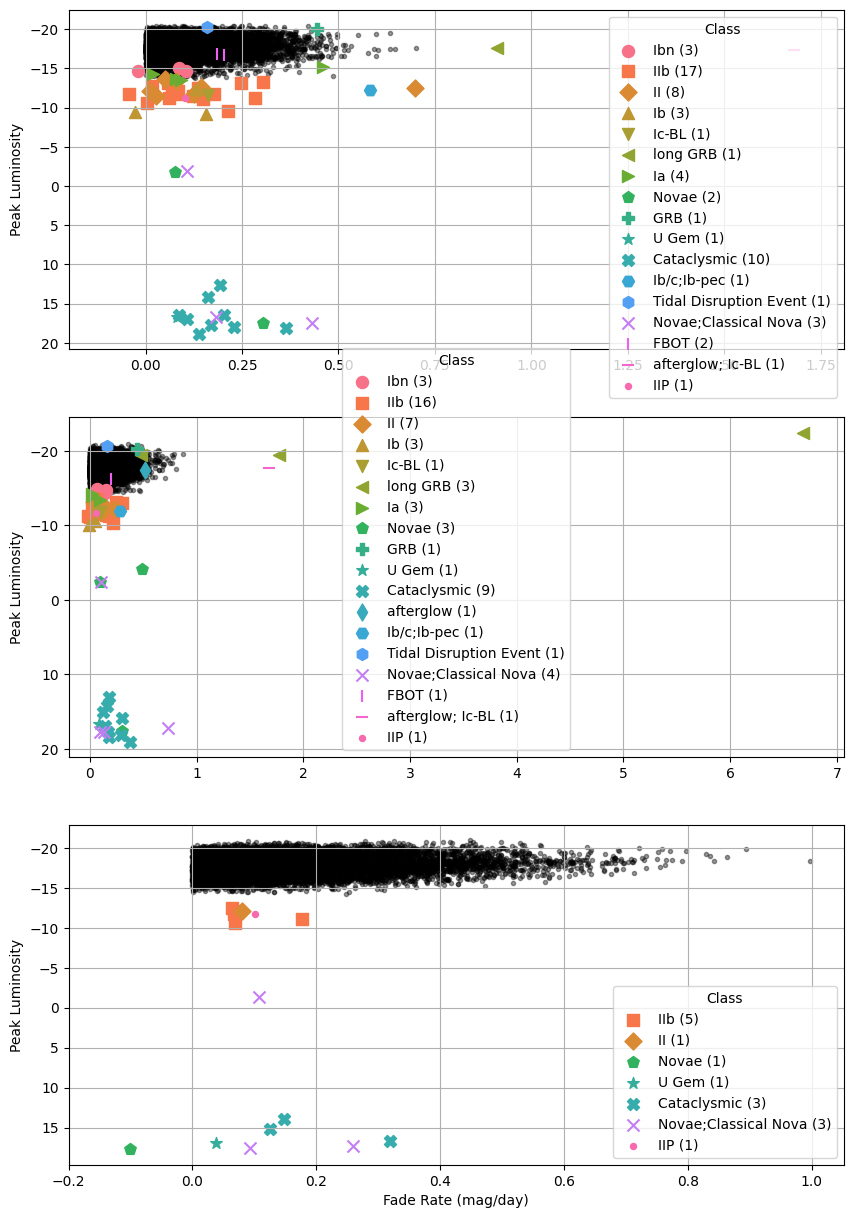

In [30]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=False)
ax[0].grid(), ax[1].grid(), ax[2].grid()
ax[0].scatter(ztfg_fade_rate, ztfg_max_luminosity_value, color='k', marker='.', alpha=0.4)
ax[1].scatter(ztfr_fade_rate, ztfr_max_luminosity_value, color='k', marker='.', alpha=0.4)
ax[2].scatter(ztfi_fade_rate, ztfi_max_luminosity_value, color='k', marker='.', alpha=0.4)


df_fadeplot = df_rates.dropna(subset=['fade_rate'])
for class_i in class_dict:
    for i, axi in enumerate(ax):
        class_data = df_fadeplot[df_fadeplot['class'] == class_i]
        filt = ['ztfg', 'ztfr', 'ztfi'][i]
        if len(class_data[class_data['filter'] == filt]) > 0:
            axi.scatter(class_data[class_data['filter'] == filt]['fade_rate'], class_data[class_data['filter'] == filt]['peak_absmag'], color=class_dict[class_i]['color'], marker=class_dict[class_i]['marker'], label=class_i, s=75)

# sns.scatterplot(data=df_fadeplot[df_fadeplot['filter'] == 'ztfg'], x='fade_rate', y='peak_absmag',  hue='class', style='class', ax=ax[0], s=100, color='k')
# sns.scatterplot(data=df_fadeplot[df_fadeplot['filter'] == 'ztfr'], x='fade_rate', y='peak_absmag',  hue='class', style='class', ax=ax[1], s=100, color='k')
# sns.scatterplot(data=df_fadeplot[df_fadeplot['filter'] == 'ztfi'], x='fade_rate', y='peak_absmag',  hue='class', style='class', ax=ax[2], s=100, color='k')

class_counts_ztfg = df_fadeplot[df_fadeplot['filter'] == 'ztfg']['class'].value_counts().to_dict()
class_counts_ztfr = df_fadeplot[df_fadeplot['filter'] == 'ztfr']['class'].value_counts().to_dict()
class_counts_ztfi = df_fadeplot[df_fadeplot['filter'] == 'ztfi']['class'].value_counts().to_dict()
for i, (axi, counts) in enumerate(zip(ax, [class_counts_ztfg, class_counts_ztfr, class_counts_ztfi])):
    handles, labels = axi.get_legend_handles_labels()
    new_labels = [f'{label} ({counts[label]})' for label in labels if label in counts]
    axi.legend(handles, new_labels, title='Class')

ax[0].invert_yaxis(), ax[1].invert_yaxis(), ax[2].invert_yaxis();
# ax[0].set_xscale('symlog'), ax[1].set_xscale('symlog'), ax[2].set_xscale('symlog');
ax[0].set_xlim(-0.2,None), ax[1].set_xlim(-0.2,None), ax[2].set_xlim(-0.2,None);

ax[0].set_ylabel("Peak Luminosity"), ax[1].set_ylabel("Peak Luminosity"), ax[2].set_ylabel("Peak Luminosity")
ax[0].set_xlabel(""), ax[1].set_xlabel(""), ax[2].set_xlabel("Fade Rate (mag/day)");

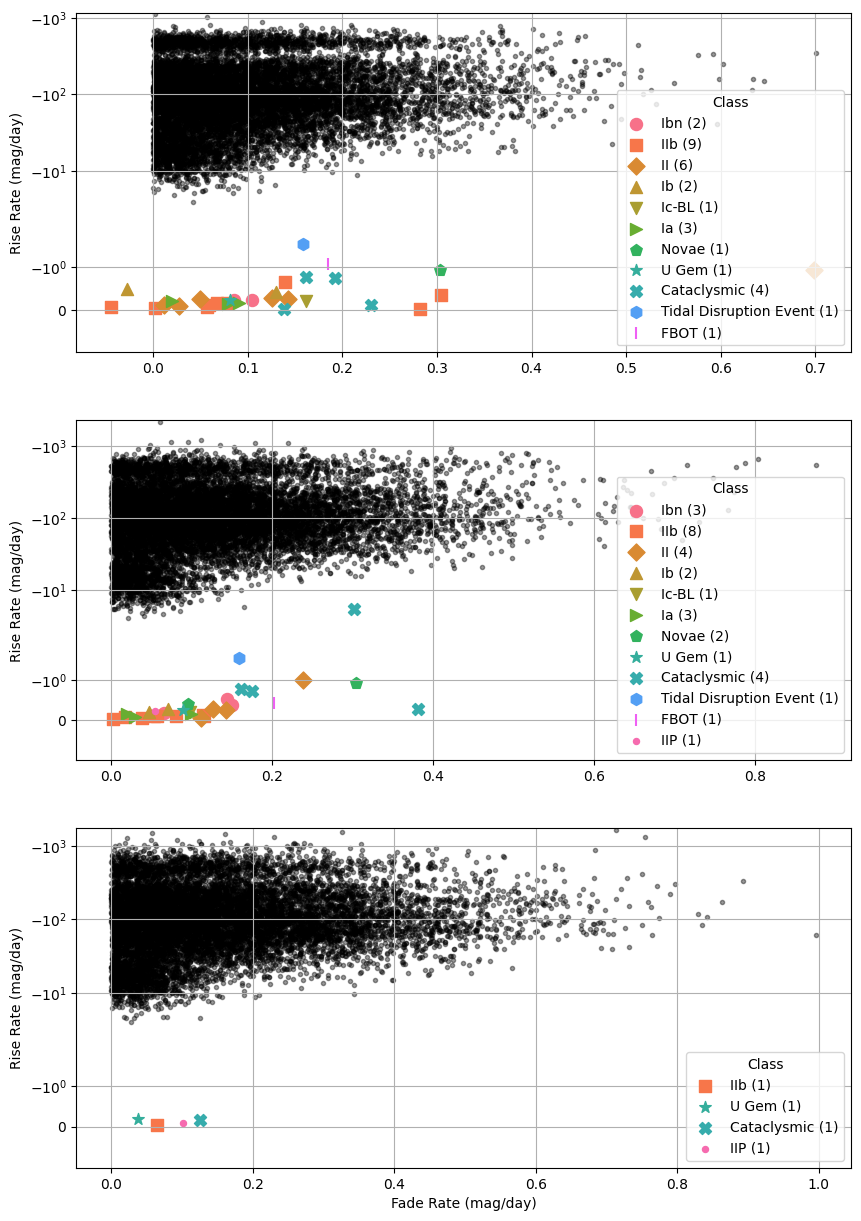

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=False)
ax[0].grid(), ax[1].grid(), ax[2].grid()
ax[0].scatter(ztfg_fade_rate, ztfg_rise_rate, color='k', marker='.', alpha=0.4)
ax[1].scatter(ztfr_fade_rate, ztfr_rise_rate, color='k', marker='.', alpha=0.4)
ax[2].scatter(ztfi_fade_rate, ztfi_rise_rate, color='k', marker='.', alpha=0.4)

df_risefadeplot = df_rates.dropna(subset=['rise_rate','fade_rate'])
for class_i in class_dict:
    for i, axi in enumerate(ax):
        class_data = df_risefadeplot[df_risefadeplot['class'] == class_i]
        filt = ['ztfg', 'ztfr', 'ztfi'][i]
        if len(class_data[class_data['filter'] == filt]) > 0:
            axi.scatter(class_data[class_data['filter'] == filt]['fade_rate'], class_data[class_data['filter'] == filt]['rise_rate'], color=class_dict[class_i]['color'], marker=class_dict[class_i]['marker'], label=class_i, s=75)

# sns.scatterplot(data=df_risefadeplot[df_risefadeplot['filter'] == 'ztfg'], x='fade_rate', y='rise_rate',  hue='class', style='class', ax=ax[0], s=100, color='k')
# sns.scatterplot(data=df_risefadeplot[df_risefadeplot['filter'] == 'ztfr'], x='fade_rate', y='rise_rate',  hue='class', style='class', ax=ax[1], s=100, color='k')
# sns.scatterplot(data=df_risefadeplot[df_risefadeplot['filter'] == 'ztfi'], x='fade_rate', y='rise_rate',  hue='class', style='class', ax=ax[2], s=100, color='k')

class_counts_ztfg = df_risefadeplot[df_risefadeplot['filter'] == 'ztfg']['class'].value_counts().to_dict()
class_counts_ztfr = df_risefadeplot[df_risefadeplot['filter'] == 'ztfr']['class'].value_counts().to_dict()
class_counts_ztfi = df_risefadeplot[df_risefadeplot['filter'] == 'ztfi']['class'].value_counts().to_dict()
for i, (axi, counts) in enumerate(zip(ax, [class_counts_ztfg, class_counts_ztfr, class_counts_ztfi])):
    handles, labels = axi.get_legend_handles_labels()
    new_labels = [f'{label} ({counts[label]})' for label in labels if label in counts]
    axi.legend(handles, new_labels, title='Class')

ax[0].invert_yaxis(), ax[1].invert_yaxis(), ax[2].invert_yaxis();
ax[0].set_yscale('symlog'), ax[1].set_yscale('symlog'), ax[2].set_yscale('symlog');
# ax[0].legend(loc='lower right'), ax[1].legend(loc='lower right');
ax[0].set_ylim(1,None), ax[1].set_ylim(1,None), ax[2].set_ylim(1,None);
ax[0].set_ylabel("Rise Rate (mag/day)"), ax[1].set_ylabel("Rise Rate (mag/day)"), ax[2].set_ylabel("Rise Rate (mag/day)")
ax[0].set_xlabel(""), ax[1].set_xlabel(""), ax[2].set_xlabel("Fade Rate (mag/day)");

In [ ]:
## function to interpolate observed lightcurves in a given time range to a specific time interval, with the first data point in that time range being taken as t=0
def interpolate_lightcurve(lightcurve, filter, time_range, time_interval):
    '''
    Function to interpolate lightcurve data to a specific time interval.
    
    Args:
    lightcurve (pd.DataFrame): Lightcurve data
    filter (str): Filter for which to interpolate the lightcurve
    time_range (tuple): Time range over which to interpolate the lightcurve
    time_interval (float): Time interval to interpolate the lightcurve to
    '''
    assert filter in lightcurve.columns, f"Filter {filter} not found in lightcurve data."
    
    ## get the time range of the lightcurve
    filtered_dataframe = lightcurve[(lightcurve['t'] >= time_range[0]) & (lightcurve['t'] <= time_range[1])]
    filtered_dataframe = filtered_dataframe[filtered_dataframe['filter'] == filter]
    ## get the time values of the filtered dataframe
    time_values = filtered_dataframe['t'].values
    ## get the magnitude values of the filtered dataframe
    mag_values = filtered_dataframe[filter].values
    ## interpolate the magnitude values to the time interval
    interp_mag = np.interp(np.arange(0, time_values[-1] - time_values[0], time_interval), time_values - time_values[0], mag_values)

    interp_df = pd.DataFrame({'t': np.arange(0, time_values[-1] - time_values[0], time_interval) + time_values[0], filter: interp_mag})
    
    return interp_df


In [ ]:
## generate new collection of lightcurves where the lightcurves are interpolated to a common time interval of t=0.31. The min and max time values listed in the candidateEval06-25.csv file (df_eval) are used as the time range for interpolation.
time_interval = 0.31
time_ranges_rise = {}
time_ranges_fade = {}

for item in df_eval['object']:
    # print(item)
    for filt in ['ztfg', 'ztfr', 'ztfi']:
        time_ranges_rise[item] = (df_eval[df_eval['object'] == item][f'{filt}_rise'].values[0].split('-')) if type (df_eval[df_eval['object'] == item][f'{filt}_rise'].values[0]) == str else (np.nan, np.nan)
        time_ranges_fade[item] = (df_eval[df_eval['object'] == item][f'{filt}_fade'].values[0].split('-')) if type (df_eval[df_eval['object'] == item][f'{filt}_fade'].values[0]) == str else (np.nan, np.nan)


rise_interpolated_lightcurves = {}
fade_interpolated_lightcurves = {}
for item in df_eval['object']:
    rise_interpolated_lightcurves[item] = {}
    fade_interpolated_lightcurves[item] = {}
    for filt in ['ztfg', 'ztfr', 'ztfi']:
        try:
            rise_interpolated_lightcurves[item][filt] = interpolate_lightcurve(bulla_grid_lightcurves[item], filt, (float(time_ranges_rise[item][0]), float(time_ranges_rise[item][1])), time_interval)
        except:
            rise_interpolated_lightcurves[item][filt] = np.nan
        try:
            fade_interpolated_lightcurves[item][filt] = interpolate_lightcurve(bulla_grid_lightcurves[item], filt, (float(time_ranges_fade[item][0]), float(time_ranges_fade[item][1])), time_interval)
        except:
            fade_interpolated_lightcurves[item][filt] = np.nan

In [ ]:
# ## plot all rise interpolated lightcurves
# fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
# ax[0].grid(), ax[1].grid(), ax[2].grid()
# for item in rise_interpolated_lightcurves:
#     print(item)
#     for filter in ['ztfg', 'ztfr', 'ztfi']:

#         ax[0].plot(rise_interpolated_lightcurves[item][filter]['t'], rise_interpolated_lightcurves[item][filter][filter], label=f'{item} {filter}')

# ax[0].set_ylabel("Magnitude")
# ax[0].set_title("Rise Interpolated Lightcurves")


In [ ]:
# fig, axs = plt.subplots(10,7, figsize=(20, 20))
# color = {'ztfg': 'g', 'ztfr': 'r', 'ztfi': 'b'}
# fast_fade_count = 0
# for i, (key, value) in enumerate(hflc_dict.items()):
#     ax = axs[i//7, i%7]
#     min_time = value[(value['mag'].notnull())][(value['filter'] == 'ztfg') | (value['filter'] == 'ztfr') | (value['filter'] == 'ztfi')]['mjd'].min()
#     ax.set_xlim(min_time-2, min_time+25)
#     ax.invert_yaxis(), ax.grid()
#     ax.set_title(f'{key}')
#     # ax.set_xlabel('MJD')
#     # ax.set_ylabel('Magnitude')
#     rise_rates = {}
#     fade_rates = {}
#     for filt in ['ztfg', 'ztfr', 'ztfi']:
#         filt_df = value[(value['filter'] == filt)  & (value['mag'].notnull())]
#         if filt_df.empty:
#             continue
#         else:
#             ax.errorbar(filt_df['mjd'], filt_df['mag'], yerr=filt_df['magerr'], fmt='o', label=filt, color=color[filt])
        
#         ## find if it has rise or fade values in the candidateEval05-30.csv file
#         try:
#             rise_time_range = hq_cands[hq_cands['Object'] == key][f'{filt} rise min/max'].values[0]
#             if type(rise_time_range) == str:
#                 rise_time_range = rise_time_range.split('-')
#                 rise_time_range = [float(rise_time_range[0]), float(rise_time_range[1])]
#                 first_data_point = filt_df[filt_df['mjd'] >= rise_time_range[0]].iloc[0]
                
#                 last_data_point = filt_df[filt_df['mjd'] <= rise_time_range[1]].iloc[-1]
#                 rise_rate = (last_data_point['mag'] - first_data_point['mag'])/(last_data_point['mjd'] - first_data_point['mjd'])
#                 rise_rates.update({filt: round(rise_rate,2)})
#                 # print(rise_rate)
#                 # ax.text(0.05, 0.95, f'Rise rate: {rise_rate:.2f}', transform=ax.transAxes, fontsize=8, verticalalignment='top')
#         except:
#             print('issue with rise rate for ', key, filt)
#             pass
#         try:
#             fade_time_range = hq_cands[hq_cands['Object'] == key][f'{filt} fade min/max'].values[0]
#             if type(fade_time_range) == str:
#                 fade_time_range = fade_time_range.split('-')
#                 fade_time_range = [float(fade_time_range[0]), float(fade_time_range[1])]
#                 first_data_point = filt_df[filt_df['mjd'] >= fade_time_range[0]].iloc[0]
#                 last_data_point = filt_df[filt_df['mjd'] <= fade_time_range[1]].iloc[-1]
#                 fade_rate = (last_data_point['mag'] - first_data_point['mag'])/(last_data_point['mjd'] - first_data_point['mjd'])
#                 fade_rates.update({filt: round(fade_rate,2)})
#                 # print(fade_rate)
#                 # ax.text(0.05, 0.95, f'Fade rate: {fade_rate:.2f}', transform=ax.transAxes, fontsize=8, verticalalignment='top')
#                 # if fade_rate > 0.3:
#                 #     print('{} has a fade rate above 0.3 in {}'.format(key, filt))
#         except:
#             print('issue with fade rate for ', key, filt)
#             pass
#     ## format dictionary to string for plotting
#     if any([float(r) > 0.3 for r in fade_rates.values()]):
#         fast_fade_count += 1
#     rise_rates = ', '.join([f'{k}: {v}' for k,v in rise_rates.items()])
#     fade_rates = ', '.join([f'{k}: {v}' for k,v in fade_rates.items()])
#     ax.text(0.05, 0.20, f'Rise: {rise_rates}', transform=ax.transAxes, fontsize=8, verticalalignment='top') if rise_rates else None
#     ax.text(0.05, 0.10, f'Fade: {fade_rates}', transform=ax.transAxes, fontsize=8, verticalalignment='top') if fade_rates else None
    
# print('number of lightcurves with fade rates above 0.3:', fast_fade_count)       
# fig.tight_layout()
# plt.show()